In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Offline Evaluation Results

In [ ]:
df = pd.read_csv("offline_eval_results.csv")
llm_df = pd.read_csv("llm_offline_eval_results.csv")

df = pd.concat([df, llm_df]).reset_index(drop=True)

df = df.sort_values(by=['k', 'name'], ascending=[True, True])

# dropping Image Summary (Tone) rows
df = df[df['name']!="Image Summary (Tone)"]
df

,name,k,hit_rate,mean_avg_prec,ndcg
8,Image Summary (Keywords),1,0.180213,0.180213,0.000000
20,Llama-3.1 Recommendations,1,0.277850,0.277850,0.000000
0,Normal,1,0.165152,0.165152,0.000000
12,Screenshot Summary (Keywords),1,0.185926,0.185926,0.000000
16,Screenshot and Header Image Keywords,1,0.203064,0.203064,0.000000
9,Image Summary (Keywords),5,0.469229,0.141729,0.343800
21,Llama-3.1 Recommendations,5,0.450273,0.154973,0.325827
1,Normal,5,0.443002,0.130200,0.319237
13,Screenshot Summary (Keywords),5,0.477279,0.144274,0.352259
17,Screenshot and Header Image Keywords,5,0.502207,0.155596,0.375539


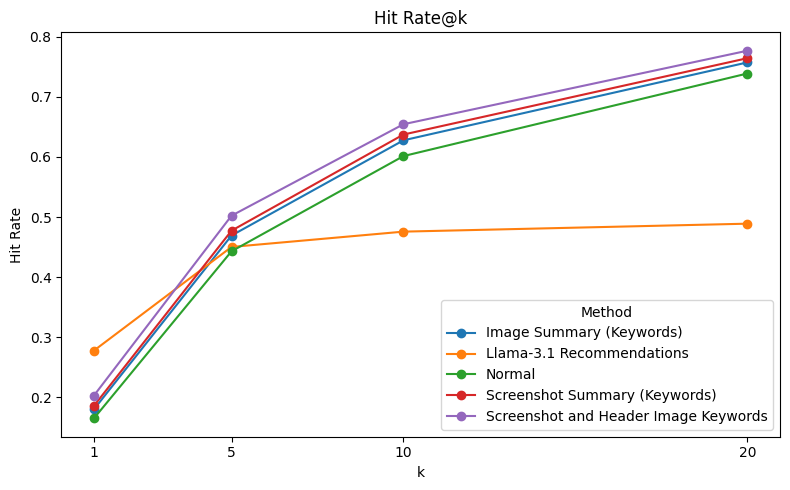

In [9]:
plt.figure(figsize=(8, 5))

for method in df['name'].unique():
    subset = df[df['name'] == method]
    plt.plot(subset['k'], subset['hit_rate'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(df['k'].unique())))
plt.ylabel('Hit Rate')
plt.title('Hit Rate@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

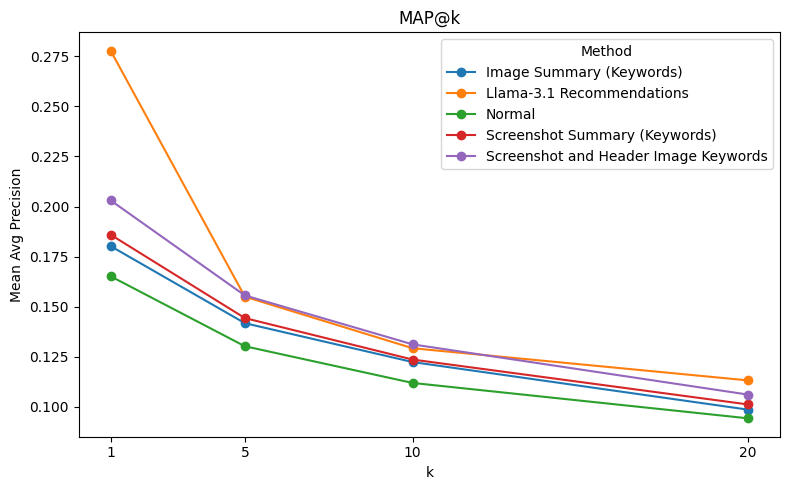

In [10]:
plt.figure(figsize=(8, 5))

for method in df['name'].unique():
    subset = df[df['name'] == method]
    plt.plot(subset['k'], subset['mean_avg_prec'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(df['k'].unique())))
plt.ylabel('Mean Avg Precision')
plt.title('MAP@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

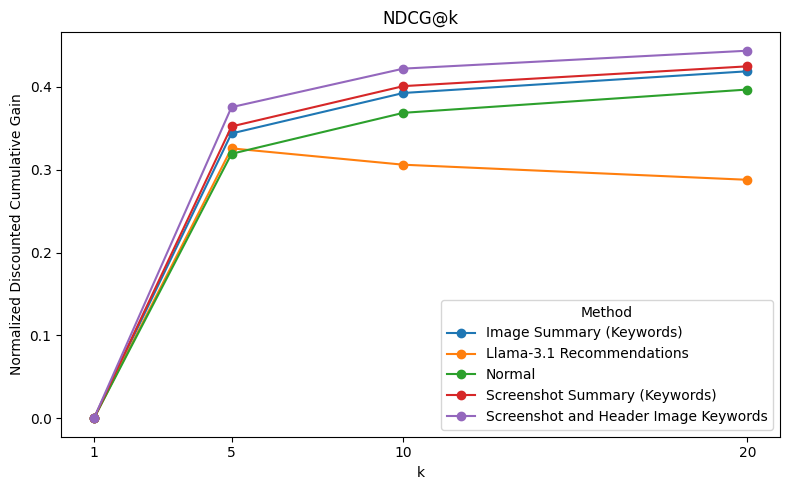

In [11]:
plt.figure(figsize=(8, 5))

for method in df['name'].unique():
    subset = df[df['name'] == method]
    plt.plot(subset['k'], subset['ndcg'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(df['k'].unique())))
plt.ylabel('Normalized Discounted Cumulative Gain')
plt.title('NDCG@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()